<a href="https://colab.research.google.com/github/Behnaz81/MachineLearningDaily/blob/main/day05_evaluation_metrics/MachineLearning5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Evaluation Metrics

The **Accuracy score** is calculated by dividing the number of correct predictions by the total prediction number.

**Precision** is a metric used in machine learning that measures the accuracy of positive predictions.

**Recall** assesses how well a model identifies all the relevant items (positive instances).

Recall = True Positives / (True Positives + False Negatives).


The **F1-score** is a measure that balances precision and recall, often used when both metrics are important.

A **confusion matrix** is a table that helps assess the performance of a classification model by comparing its predictions to the actual values.

A **Receiver Operating Characteristic (ROC)** curve is a graph that visualizes the performance of a binary classification model by plotting the True Positive Rate (TPR) against the False Positive Rate (FPR) at various classification thresholds.

In [34]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

## Loading Dataset

Here we loaded, scaled and splitted data into train and test.

In [13]:
X = load_breast_cancer().data
y = load_breast_cancer().target

In [14]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Logistic Regression

In [19]:
lgr = LogisticRegression()
lgr = lgr.fit(X_train, y_train)

In [21]:
y_pred = lgr.predict(X_test)

We evaluated the models using many matrics. One of them is **confusion matrix**. It shows which classes were more missclassified in a graphical way.

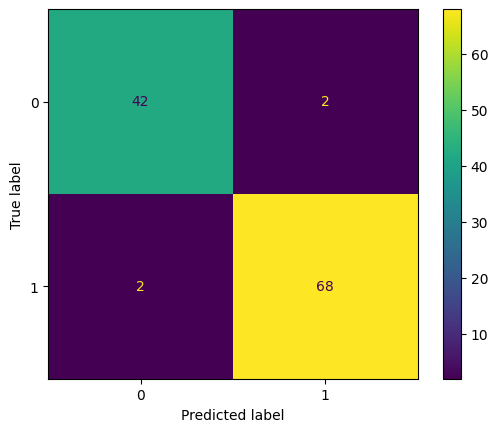

In [24]:
cm = confusion_matrix(y_test, y_pred, labels=lgr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=lgr.classes_)
disp.plot()
plt.show()

Also you can see **precision**, **recall**, and **f1-score** for each class. These can tell us how good they were classified using numbers.

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        44
           1       0.97      0.97      0.97        70

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



As seen **ROC curve** shows that it's a good model and it's close to a perfect one.

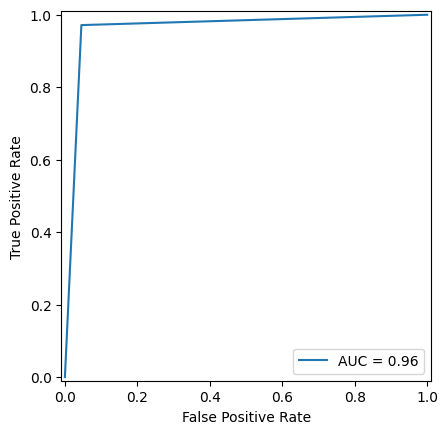

In [33]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()
plt.show()

## Decision Tree

In [35]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)

In [36]:
y_pred = dtree.predict(X_test)

As seen here decision tree worked not as well as the logistic regression model on predicting class 1. If we only focuse on **accuracy** we can see that it's almost the same for both models where in fact there is a difference.

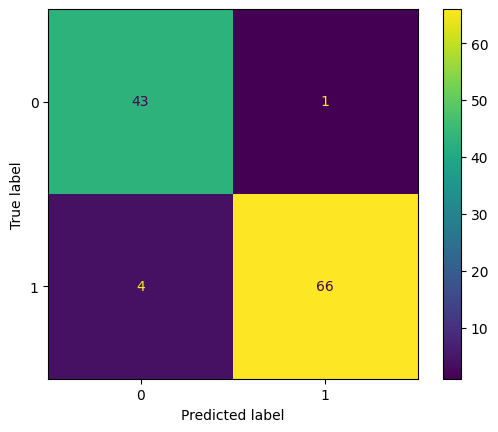

In [37]:
cm = confusion_matrix(y_test, y_pred, labels=dtree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=dtree.classes_)
disp.plot()
plt.show()

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95        44
           1       0.99      0.94      0.96        70

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



As seen here the ROC curve shows that the model is as good as logisitc regression model.

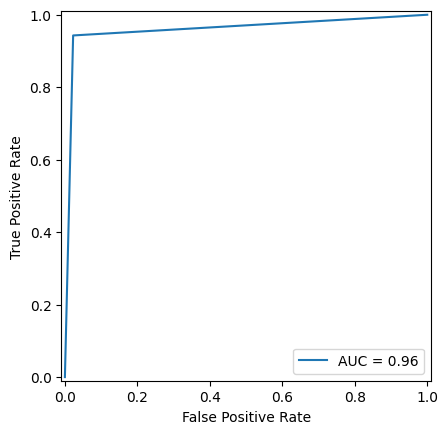

In [39]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()
plt.show()

## Conclusion

As mentioned before we can't rely on accuracy to judge a model especially if one class is more important for us. In this case depending on predicting which class is more important we can use precision and recall and to have a more graphical insight we can use confusion matrix. In scenarios like disease diagnosis, recall is more important — for example, when you don't want to mistakenly classify an actual patient as healthy. Also ROC curve is used to evaluate and compare the performance of binary classification models.